In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# How do we get tweets from farther back (before the 3200th most recent)

ted_cruz = pd.read_csv("tedCruz_tweets1.csv")
ted_cruz = ted_cruz.drop(columns=['Unnamed: 0'])

In [9]:
ted_cruz.head(5)

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2020-05-28 15:58:04+00:00,1266036023177424899,1266036023177424896,RT @eriksson_magnus: Ted Cruz Blasts Google Ov...,False,"{'hashtags': [{'text': 'StopTheBias', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,130,0,False,False,NaN,en,NaN,NaN,NaN,NaN
1,2020-05-28 18:14:23+00:00,1266070330071752707,1266070330071752704,Congrats! @chiproytx Leadership. https://t.co/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,51,249,False,False,0.0,en,NaN,1.266057e+18,1.266057e+18,{'created_at': 'Thu May 28 17:21:02 +0000 2020...
2,2020-05-28 19:09:27+00:00,1266084188853358592,1266084188853358592,"Harvard Law professor attacks homeschooling, i...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,620,1952,False,False,0.0,en,NaN,NaN,NaN,NaN
3,2020-05-28 19:09:34+00:00,1266084215688478722,1266084215688478720,"RT @DeAngelisCorey: Elizabeth Bartholet: ""Ban ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,208,0,False,False,NaN,en,NaN,NaN,NaN,NaN
4,2020-05-28 19:27:37+00:00,1266088757792555009,1266088757792555008,RT @DeAngelisCorey: Bartholet accuses @TedCruz...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,91,0,False,False,NaN,en,NaN,NaN,NaN,NaN


In [14]:
ted_cruz.dtypes

created_at                    object
id                             int64
id_str                         int64
text                          object
truncated                       bool
entities                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
user                          object
geo                          float64
coordinates                  float64
place                        float64
contributors                 float64
retweeted_status              object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
possibly_sensitive           float64
lang                          object
extended_entities             object
quoted_status_id             float64
q

In [98]:
ted_cruz_sorted = ted_cruz.sort_values(by = 'created_at', ascending = True)
a = ted_cruz_sorted[["text", "retweeted", "retweet_count"]]
a.loc[a.retweeted == True]

,text,retweeted,retweet_count


In [45]:
def create_fix(lst):
    res = []
    for i in lst:
        res.append(i[:10])
    return res

lst_days = create_fix(ted_cruz_sorted.created_at.tolist())
ted_cruz_sorted["date"] = lst_days

In [47]:
cleaned = ted_cruz_sorted[["retweet_count", "date"]]
cleaned = cleaned.groupby(['date']).mean()


,retweet_count
date,
2020-05-28,679.095238
2020-05-29,1507.137931
2020-05-30,6209.071429
2020-05-31,2041.750000
2020-06-01,4705.000000
...,...
2021-01-24,4016.400000
2021-01-25,1862.000000
2021-01-26,1018.307692


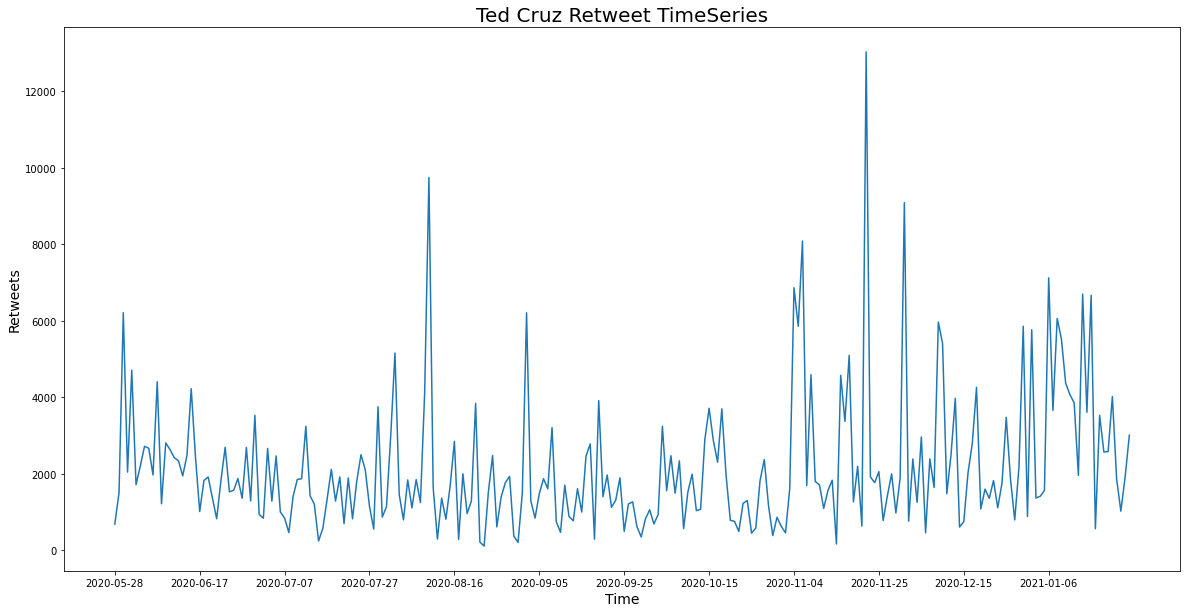

In [60]:
# Make smoother (scypy for image processing libraries)

plt.figure(figsize=(20, 10))
plt.plot(cleaned.index.tolist(), cleaned.retweet_count.tolist())
plt.title("Ted Cruz Retweet TimeSeries", size = 20)
plt.xlabel("Time", size = 14)
plt.ylabel("Retweets", size = 14)
plt.xticks(range(0, len(cleaned.index.tolist()), 20))
plt.show()

In [88]:
ted_retweets = ted_cruz_sorted.sort_values(by = 'retweet_count', ascending = False)
most_retweeted = ted_retweets.head(5)[["date", "text", "retweet_count", "retweeted", "source"]]
most_retweeted

,date,text,retweet_count,retweeted,source
67,2020-05-30,RT @NASA: We have liftoff. History is made as ...,66978,False,"<a href=""http://twitter.com/download/iphone"" r..."
2277,2020-10-14,RT @SohrabAhmari: This is a Big Tech informati...,54377,False,"<a href=""http://twitter.com/download/iphone"" r..."
59,2020-05-30,RT @SpaceX: Live webcast of Crew Dragon’s test...,51918,False,"<a href=""http://twitter.com/download/iphone"" r..."
2327,2020-10-15,RT @PressSec: Censoring political speech is wh...,36121,False,"<a href=""http://twitter.com/download/iphone"" r..."
58,2020-05-30,RT @SpaceX: Ready for launch @NASA https://t.c...,33242,False,"<a href=""http://twitter.com/download/iphone"" r..."


In [89]:
most_retweeted.source.tolist()[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [69]:
most_retweets = most_retweeted.retweet_count.tolist()[0]
most_retweets

# Is this how many people retweeted the original post or how many people retweeted TC's retweet?

66978

In [79]:
# Full tweet?

tweet_with_most_retweets = most_retweeted.text.tolist()[0]
tweet_with_most_retweets

'RT @NASA: We have liftoff. History is made as @NASA_Astronauts launch from @NASAKennedy for the first time in nine years on the @SpaceX Cre…'

In [82]:
len(tweet_with_most_retweets)

140

In [81]:
ted_cruz_sorted.loc[ted_cruz_sorted.date == "2020-05-30"].head(10)

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,date
50,2020-05-30 00:51:52+00:00,1266532748178722817,1266532748178722816,If they care about trying to salvage even a sh...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,3056,False,False,0.0,en,NaN,1.266486e+18,1.266486e+18,{'created_at': 'Fri May 29 21:44:23 +0000 2020...,2020-05-30
51,2020-05-30 01:00:56+00:00,1266535027208335361,1266535027208335360,Important thread by one of the best foreign po...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,1689,False,False,0.0,en,NaN,1.266496e+18,1.266496e+18,{'created_at': 'Fri May 29 22:27:06 +0000 2020...,2020-05-30
52,2020-05-30 01:12:59+00:00,1266538061476900865,1266538061476900864,RT @ByronYork: Read this thread.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,0,False,False,NaN,en,NaN,1.266496e+18,1.266496e+18,NaN,2020-05-30
53,2020-05-30 01:35:35+00:00,1266543746868543494,1266543746868543488,RT @theMRC: It's not just President @realDonal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,2020-05-30
54,2020-05-30 01:59:50+00:00,1266549851493408768,1266549851493408768,This can’t be true. The media told me there’s ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,3481,False,False,0.0,en,NaN,1.266366e+18,1.266366e+18,{'created_at': 'Fri May 29 13:49:00 +0000 2020...,2020-05-30
55,2020-05-30 05:15:41+00:00,1266599139879669761,1266599139879669760,"Ted Cruz on Floyd's death, riots: 'The law sho...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,2271,False,False,0.0,en,NaN,NaN,NaN,NaN,2020-05-30
56,2020-05-30 05:55:32+00:00,1266609168770891776,1266609168770891776,RT @TheRealBuzz: Few men in our nation's histo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,2020-05-30
57,2020-05-30 16:39:04+00:00,1266771118918184961,1266771118918184960,RT @NASA: Welcome Back to Launch Day 🚀\n\n#Lau...,False,"{'hashtags': [{'text': 'LaunchAmerica', 'indic...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,2020-05-30
58,2020-05-30 18:40:04+00:00,1266801567119876099,1266801567119876096,RT @SpaceX: Ready for launch @NASA https://t.c...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,0,False,False,0.0,en,"{'media': [{'id': 1266798323437989888, 'id_str...",NaN,NaN,NaN,2020-05-30
59,2020-05-30 18:40:07+00:00,1266801581032382464,1266801581032382464,RT @SpaceX: Live webcast of Crew Dragon’s test...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,0,False,False,0.0,en,NaN,NaN,NaN,NaN,2020-05-30


In [90]:
ted_cruz_sorted.sort_values(by = 'retweet_count', ascending = True)[["created_at", "text", "date", "retweet_count"]].head(20)


,created_at,text,date,retweet_count
1439,2020-08-31 20:29:27+00:00,@drpizza007 Indisputably.,2020-08-31,0
839,2020-07-19 23:17:05+00:00,@jbillinson wanna bet?,2020-07-19,0
2832,2020-12-07 05:11:15+00:00,@WriterKevin fair point,2020-12-07,0
3008,2020-12-27 20:58:41+00:00,@49ersCamelot Me too!,2020-12-27,0
1965,2020-10-03 22:08:49+00:00,@DiDi2009 True. And thx!,2020-10-03,0
347,2020-06-15 04:41:18+00:00,@blessed4home @SenTedCruz This one was me.,2020-06-15,0
674,2020-07-07 12:25:06+00:00,@jackaross @SenJoniErnst Fully agree. And I’ve...,2020-07-07,1
2965,2020-12-22 17:58:16+00:00,@JoeBangles11 Gouda. 🧀,2020-12-22,1
3144,2021-01-26 14:06:54+00:00,@NancyLRogers1 thx. done.,2021-01-26,2
2087,2020-10-08 18:45:33+00:00,@KFILE Praise God! Wonderful news.,2020-10-08,3
